In [76]:
import os 

import matplotlib.pyplot as plt

In [77]:
path = os.path.join(os.getcwd(), 'data', 'crusader_flash')

path

'd:\\Repos\\CGProj\\data\\crusader_flash'

In [78]:
import cv2

images = []

for i in [1, 2, 3]:
    
    img = cv2.imread(os.path.join(path, f'{i}.jpeg'))
    
    
    images.append(img)
    

In [79]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
from exposure_fusion import ExposureFusion

fuser_ours = ExposureFusion(perform_alignment=True, use_softmax=False, sigma=0.2, pyramid_levels=2, matches_to_consider=16)
fuser_standard = ExposureFusion(
    perform_alignment=False, use_softmax=False, sigma=0.2, pyramid_levels=2)


In [81]:
print(fuser_ours != fuser_standard)

True


In [82]:
import copy 

img1 = copy.deepcopy(images)
img2 = copy.deepcopy(images)


HDR_ours = fuser_ours(img1)
HDR_standard = fuser_standard(img2)


29-Dec-22 15:11:04 - INFO - Input images are valid, proceeding with Exposure Fusion
29-Dec-22 15:11:04 - INFO - Processing 3 images, with shape (2016, 1512, 3)
29-Dec-22 15:11:04 - INFO - Performing image alignment
29-Dec-22 15:11:04 - INFO - Calculating weights
29-Dec-22 15:11:05 - INFO - Creating image pyramids
29-Dec-22 15:11:05 - INFO - Blending pyramids into final Laplacian
29-Dec-22 15:11:05 - INFO - Reconstructing final HDR image
29-Dec-22 15:11:05 - INFO - Input images are valid, proceeding with Exposure Fusion
29-Dec-22 15:11:05 - INFO - Processing 3 images, with shape (2016, 1512, 3)
29-Dec-22 15:11:05 - INFO - Skipping image alignment
29-Dec-22 15:11:05 - INFO - Calculating weights
29-Dec-22 15:11:07 - INFO - Creating image pyramids
29-Dec-22 15:11:07 - INFO - Blending pyramids into final Laplacian
29-Dec-22 15:11:07 - INFO - Reconstructing final HDR image


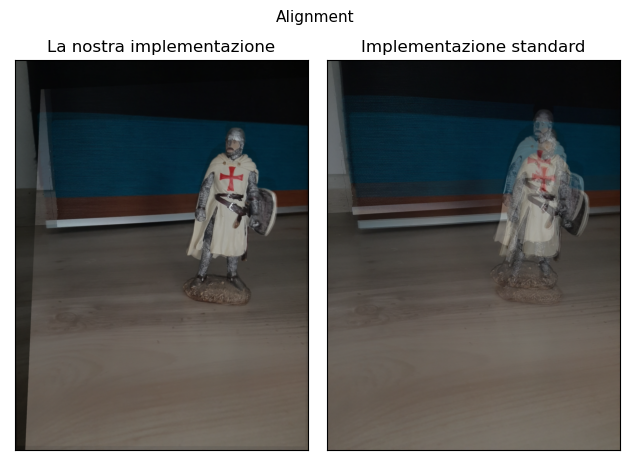

In [83]:


#two subplots, the axes array is 1-d

f, axarr = plt.subplots(1, 2)

axarr[0].imshow(cv2.cvtColor(HDR_ours, cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(HDR_standard, cv2.COLOR_BGR2RGB))

f.tight_layout()
f.suptitle("Alignment", fontsize=11)

axarr[0].set_title("La nostra implementazione")
axarr[1].set_title("Implementazione standard")

axarr[0].get_xaxis().set_visible(False)
axarr[1].get_xaxis().set_visible(False)
axarr[0].get_yaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)

f.tight_layout()

plt.savefig('alignment.png', dpi=600)
plt.show()


In [84]:

cv2.imwrite('data/outs/HDR_standard.png', HDR_standard)
cv2.imwrite('data/outs/HDR_ours.png', HDR_ours)


True

In [85]:
# softmax function

import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

def normalize(X):
    
    return X / np.sum(X)

x = [0.1, 0.1, 0.1, 0.1, 0.1, 0.6]

A = softmax(np.array(x))


In [86]:
B = normalize(np.array(x))


In [87]:
A

array([0.15040486, 0.15040486, 0.15040486, 0.15040486, 0.15040486,
       0.24797569])

In [88]:
B

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.54545455])